In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [6]:
# 2. Load the Dataset
coffee_data = pd.read_csv(r"C:\Users\rohit\OneDrive\Documents\coffee_data.csv")
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [7]:
# 3. Dataset Information
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [8]:
# 4. Check Missing Values
coffee_data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [9]:
# 5. Check Duplicate Records
coffee_data.duplicated().sum()

np.int64(0)

In [10]:
# 6. Statistical Summary
coffee_data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [11]:

# 1. Sort Data By Date (Important Step)
coffee_data = coffee_data.sort_values('date')
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


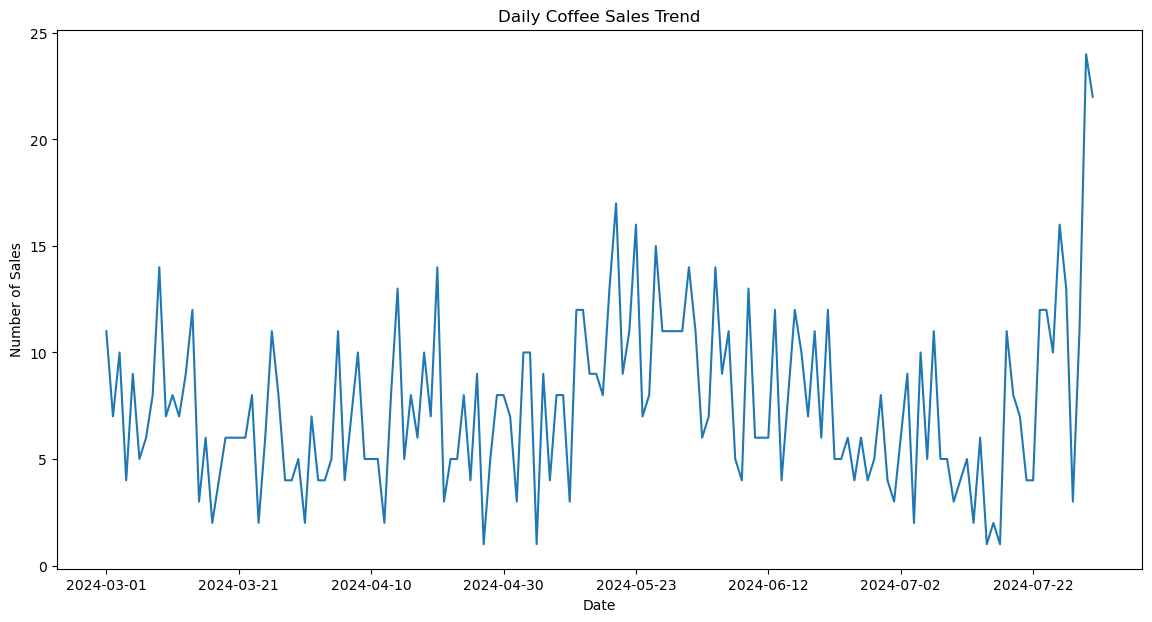

In [13]:
# 2. Daily Sales Trend
#Count of Transactions Per Day
daily_sales = coffee_data.groupby('date').count()['coffee_name']

plt.figure(figsize=(14,7))
daily_sales.plot()
plt.title("Daily Coffee Sales Trend")
plt.xlabel("Date")
plt.ylabel("Number of Sales")
plt.show()
#Shows day-to-day sales variation.

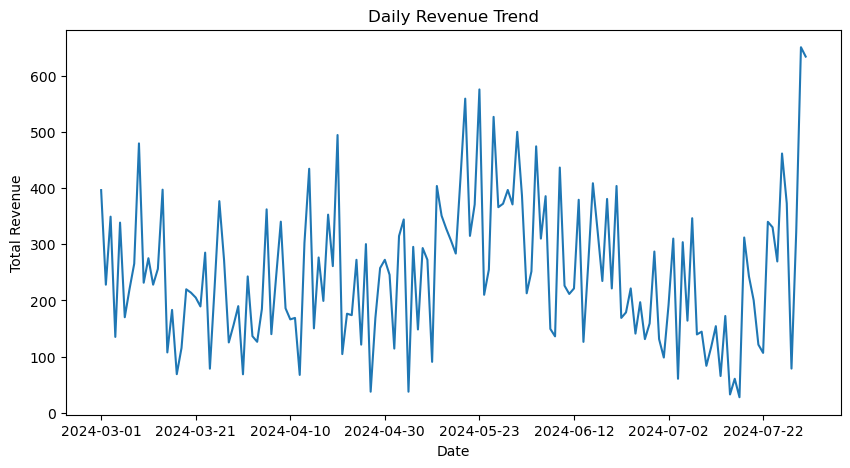

In [14]:
# 3. Daily Revenue Trend
daily_revenue = coffee_data.groupby('date')['money'].sum()
plt.figure(figsize=(10,5))
daily_revenue.plot()
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.show()
# Shows income pattern over time.

In [15]:
coffee_data['month'] = pd.to_datetime(coffee_data['date']).dt.strftime('%Y-%m')
monthly_sales = coffee_data.groupby('month').count()['coffee_name']
print(coffee_data.columns)


Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name',
       'month'],
      dtype='object')


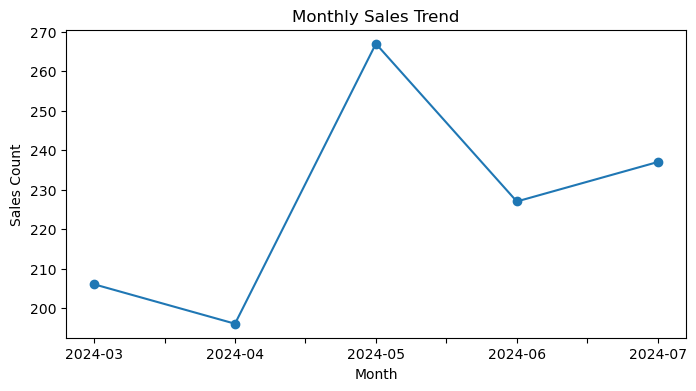

In [16]:
# 4. Monthly Sales Trend 

monthly_sales = coffee_data.groupby('month').count()['coffee_name']

plt.figure(figsize=(8,4))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales Count")
plt.show()
# Helps identify growth or decline in sales.

In [18]:
coffee_data['hour'] = pd.to_datetime(coffee_data['date']).dt.strftime('%Y-%m')
hourly_sales = coffee_data.groupby('hour').count()['coffee_name']
print(coffee_data.columns)

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name',
       'month', 'hour'],
      dtype='object')


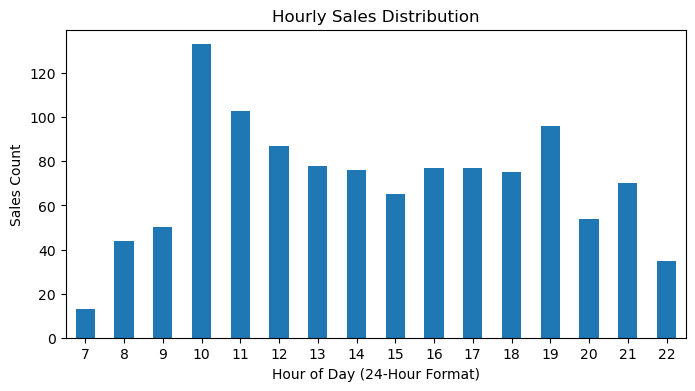

In [56]:
# 5. Hourly Sales Pattern (Peak Time Analysis)
# Make sure datetime column is in datetime format
coffee_data['datetime'] = pd.to_datetime(coffee_data['datetime'])

# Extract hour (0–23)
coffee_data['hour'] = coffee_data['datetime'].dt.hour

# Hourly Sales Analysis
hourly_sales = coffee_data.groupby('hour').count()['coffee_name']

# Plot Hourly Distribution
plt.figure(figsize=(8,4))

hourly_sales.plot(kind='bar')

plt.title("Hourly Sales Distribution")
plt.xlabel("Hour of Day (24-Hour Format)")
plt.ylabel("Sales Count")

plt.xticks(rotation=0)

plt.show()


# Finds peak business hours.

In [20]:
coffee_data['day'] = pd.to_datetime(coffee_data['date']).dt.strftime('%Y-%m')
weekly_sales = coffee_data.groupby('day').count()['coffee_name']
print(coffee_data.columns)

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name',
       'month', 'hour', 'day'],
      dtype='object')


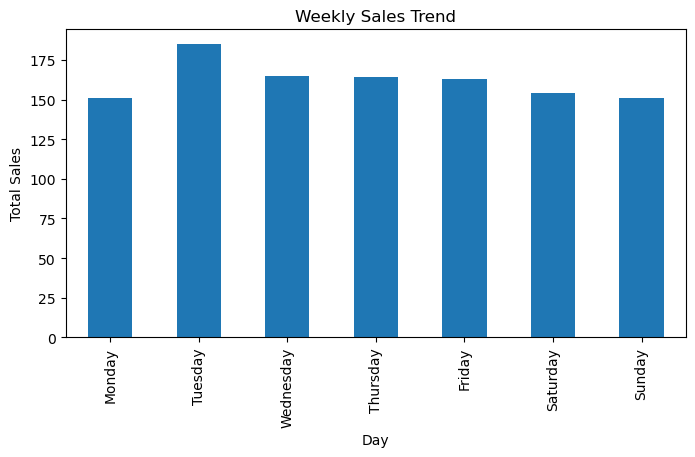

In [55]:
# 6. Weekly Trend Analysis
# Convert date column to datetime (if not already)
coffee_data['date'] = pd.to_datetime(coffee_data['date'])

# Create day name column
coffee_data['day_name'] = coffee_data['date'].dt.day_name()

# Weekly Sales Analysis Using Day Names
weekday_sales = coffee_data.groupby('day_name').count()['coffee_name']

# Arrange days in correct order
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_sales = weekday_sales.reindex(order)

# Plot
plt.figure(figsize=(8,4))

weekday_sales.plot(kind='bar')

plt.title("Weekly Sales Trend")
plt.xlabel("Day")
plt.ylabel("Total Sales")

plt.show()


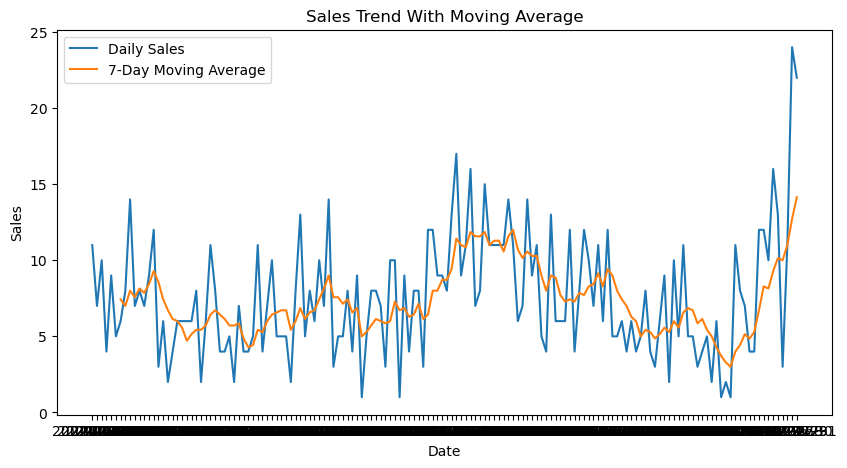

In [22]:
# 8. Rolling Average (Smoothing Trend)
rolling_sales = daily_sales.rolling(window=7).mean()

plt.figure(figsize=(10,5))
plt.plot(daily_sales, label='Daily Sales')
plt.plot(rolling_sales, label='7-Day Moving Average')
plt.legend()
plt.title("Sales Trend With Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

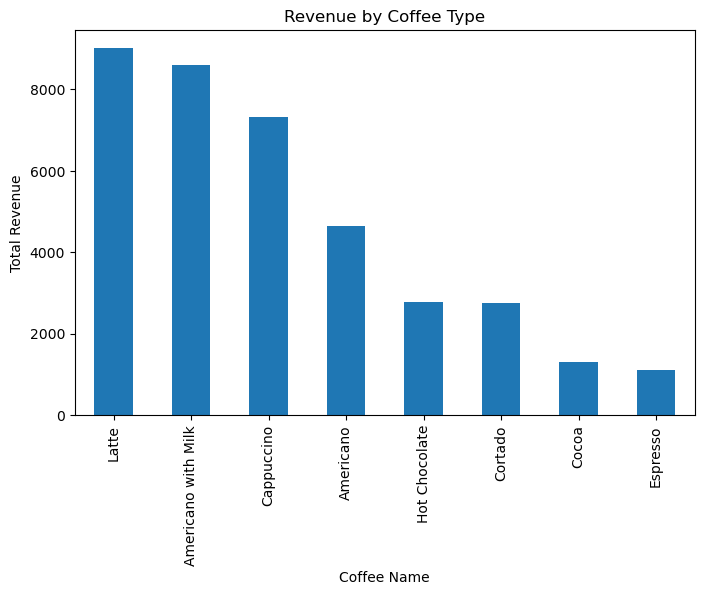

In [26]:
#Revenue by Coffee Type
revenue_data = coffee_data.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
revenue_data.plot(kind='bar')
plt.title("Revenue by Coffee Type")
plt.xlabel("Coffee Name")
plt.ylabel("Total Revenue")
plt.show()

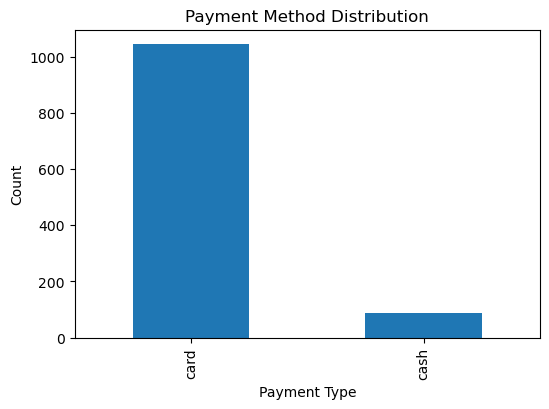

In [23]:
#  Payment Method Visualization
plt.figure(figsize=(6,4))
coffee_data['cash_type'].value_counts().plot(kind='bar')
plt.title("Payment Method Distribution")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

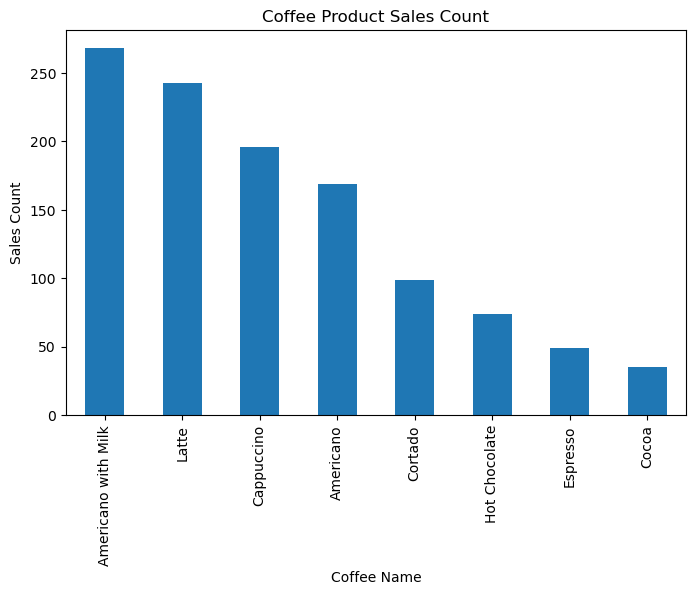

In [24]:
#Coffee Product Sales Visualization
plt.figure(figsize=(8,5))
coffee_data['coffee_name'].value_counts().plot(kind='bar')
plt.title("Coffee Product Sales Count")
plt.xlabel("Coffee Name")
plt.ylabel("Sales Count")
plt.show()


In [25]:
# SPECIFIC CUSTOMER PURCHASES
# 1. Check Customer Column
coffee_data['card'].head()


0    ANON-0000-0000-0001
1    ANON-0000-0000-0002
2    ANON-0000-0000-0002
3    ANON-0000-0000-0003
4    ANON-0000-0000-0004
Name: card, dtype: object

In [26]:
# 2. Remove Cash Users (Because They Have No Card ID)
customer_data = coffee_data[coffee_data['card'].notnull()]
customer_data.head()

,date,datetime,cash_type,card,money,coffee_name,month,hour,day
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024-03,2024-03,2024-03
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,2024-03,2024-03
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024-03,2024-03,2024-03
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024-03,2024-03,2024-03
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024-03,2024-03,2024-03


In [28]:
# 3. Total Purchases Per Customer
customer_purchase_count = customer_data.groupby('card').count()['coffee_name']\
.sort_values(ascending=False)
customer_purchase_count.head(10)

#This shows top 10 customers by number of purchases.

card
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000-0000-0003    23
ANON-0000-0000-0040    22
ANON-0000-0000-0001    17
ANON-0000-0000-0141    17
ANON-0000-0000-0059    12
ANON-0000-0000-0024    12
ANON-0000-0000-0180    12
Name: coffee_name, dtype: int64

In [29]:
# 4. Total Money Spent By Each Customer
customer_spending = customer_data.groupby('card')['money']\
.sum().sort_values(ascending=False)
customer_spending.head(10)

#This shows highest spending customers.

card
ANON-0000-0000-0012    2593.18
ANON-0000-0000-0009    2212.70
ANON-0000-0000-0097     882.22
ANON-0000-0000-0040     706.36
ANON-0000-0000-0003     651.96
ANON-0000-0000-0001     646.14
ANON-0000-0000-0141     474.64
ANON-0000-0000-0180     442.84
ANON-0000-0000-0024     422.26
ANON-0000-0000-0134     405.12
Name: money, dtype: float64

In [30]:
# 5. Favorite Coffee Of Each Customer
favorite_coffee = customer_data.groupby(['card','coffee_name'])\
.size().reset_index(name='count')

favorite_coffee.sort_values(['card','count'], ascending=False).head(10)


#This shows which coffee each customer buys most.

,card,coffee_name,count
595,ANON-0000-0000-0446,Latte,1
594,ANON-0000-0000-0445,Latte,1
593,ANON-0000-0000-0444,Latte,1
591,ANON-0000-0000-0443,Cortado,2
592,ANON-0000-0000-0443,Latte,1
590,ANON-0000-0000-0442,Cocoa,1
589,ANON-0000-0000-0441,Cortado,1
588,ANON-0000-0000-0440,Latte,1
587,ANON-0000-0000-0439,Cortado,1
586,ANON-0000-0000-0438,Americano with Milk,1


In [31]:
# 6. Most Loyal Customers (Frequent Buyers)
loyal_customers = customer_data['card'].value_counts().head(10)
loyal_customers

card
ANON-0000-0000-0012    88
ANON-0000-0000-0009    63
ANON-0000-0000-0097    27
ANON-0000-0000-0003    23
ANON-0000-0000-0040    22
ANON-0000-0000-0141    17
ANON-0000-0000-0001    17
ANON-0000-0000-0180    12
ANON-0000-0000-0024    12
ANON-0000-0000-0059    12
Name: count, dtype: int64

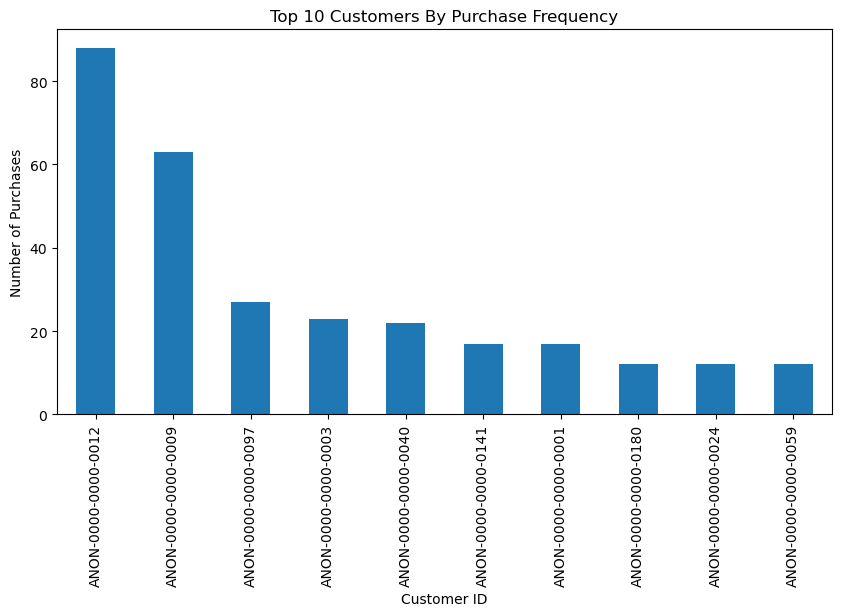

In [32]:
# 7. Visualization – Top 10 Customers
plt.figure(figsize=(10,5))
loyal_customers.plot(kind='bar')
plt.title("Top 10 Customers By Purchase Frequency")
plt.xlabel("Customer ID")
plt.ylabel("Number of Purchases")
plt.show()

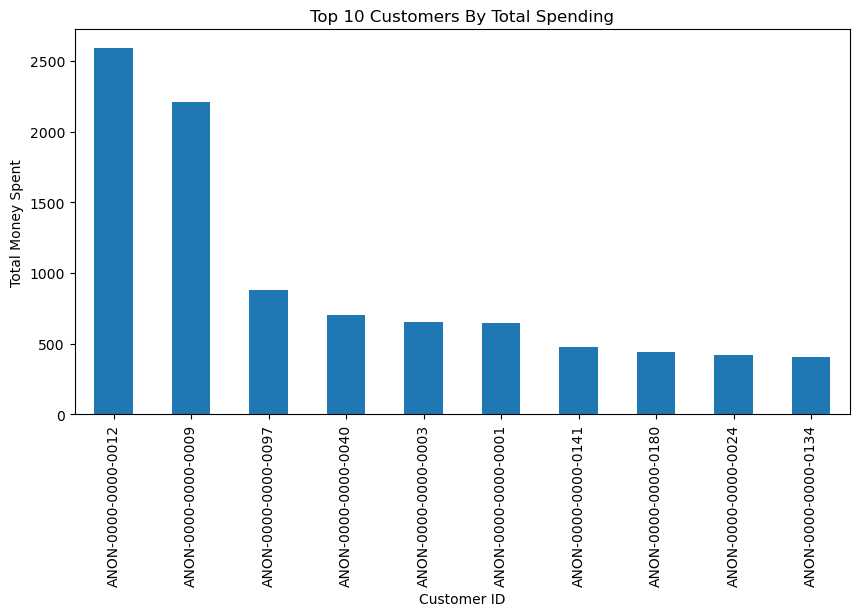

In [45]:
# 8. Visualization – Top 10 Spending Customers
plt.figure(figsize=(10,5))
customer_spending.head(10).plot(kind='bar')
plt.title("Top 10 Customers By Total Spending")
plt.xlabel("Customer ID")
plt.ylabel("Total Money Spent")
plt.show()

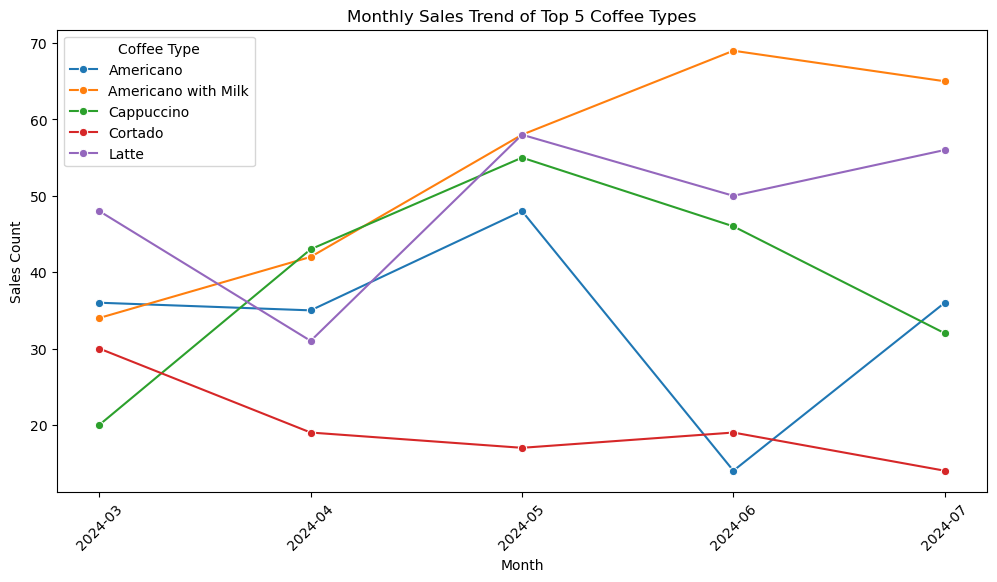

In [54]:
# Get top 5 coffee types
top_5 = coffee_data['coffee_name'].value_counts().head(5).index

# Filter dataset for top 5 coffees
top_5_data = coffee_data[coffee_data['coffee_name'].isin(top_5)]

# Create monthly sales for top 5 coffees
monthly_top5 = top_5_data.groupby(['month','coffee_name']).size().reset_index(name='sales')

# Plot multi-line chart
plt.figure(figsize=(12,6))

sns.lineplot(data=monthly_top5,
             x='month',
             y='sales',
             hue='coffee_name',
             marker='o')

plt.title("Monthly Sales Trend of Top 5 Coffee Types")
plt.xlabel("Month")
plt.ylabel("Sales Count")

plt.xticks(rotation=45)
plt.legend(title="Coffee Type")

plt.show()
